# Classification

IBM HR Analytics Employee Attrition & Performance Predict attrition of your valuable employees

Resouce:https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Description
Predict the job level of the employee

The reason why I choose this target value.
There are several columns I can use classification,

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

At the first, I chose JobSatisfaction. I ran the model and the highest model scoree is lower than 0.3. So I list the relation of all this columns and found out that the JobLevel has the highest relation to other parameters. So it is a better target value to predict and using different models to compare.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [4]:
#Read the data
data = pd.read_csv('Employee.csv')
data = data.dropna()
data.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
0,41,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,...,5993,8,Yes,3,1,8,0,1,6,4
1,49,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,...,5130,1,No,4,4,10,3,3,10,7
2,37,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,...,2090,6,Yes,3,2,7,3,3,0,0
3,33,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,...,2909,1,Yes,3,3,8,3,3,8,7
4,27,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,...,3468,9,No,3,4,6,3,3,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1098a7850>,
      dtype=object)

<Figure size 1440x720 with 0 Axes>

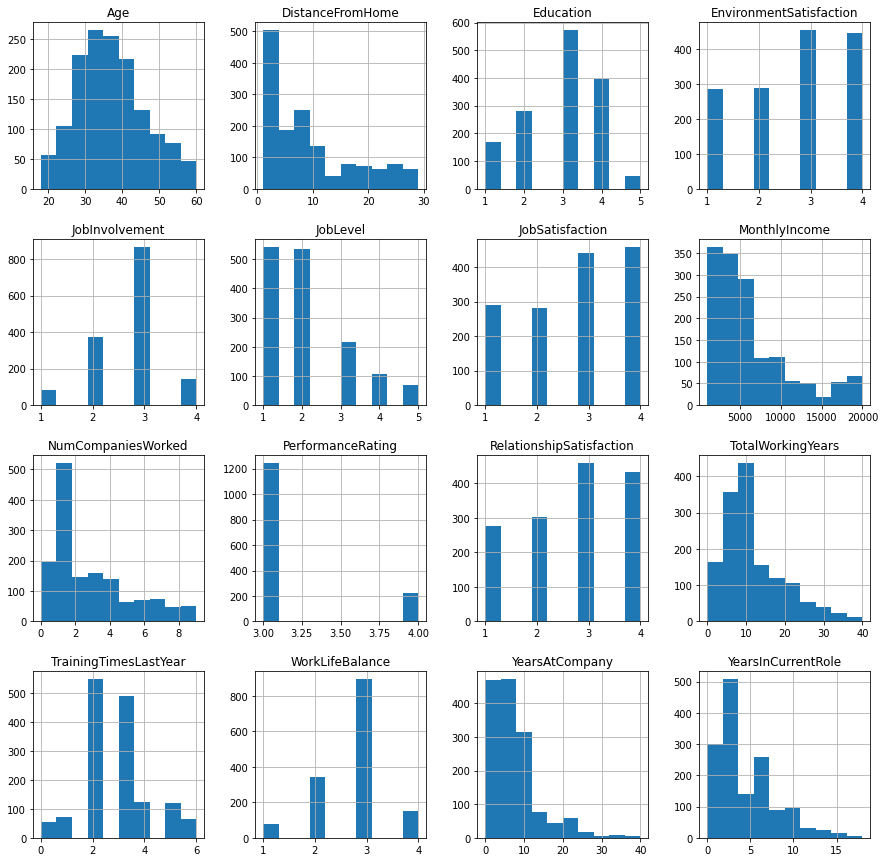

In [5]:
plt.figure(figsize=(20,10))
data.hist(bins=10, figsize = (15,15))

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 <a list of 13 Text major ticklabel objects>)

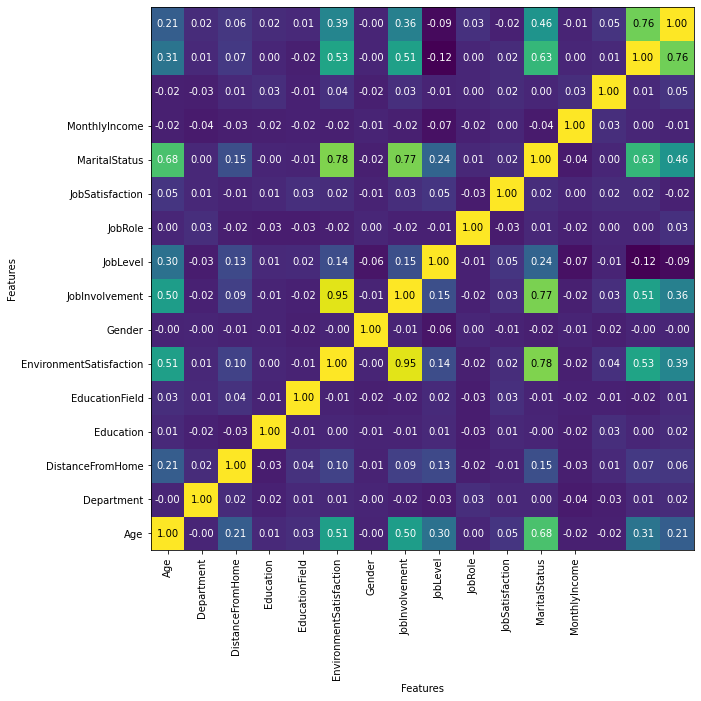

In [6]:
import mglearn

corr_matrix = data.corr()
corr_matrix
plt.figure(figsize=(20,10))
mglearn.tools.heatmap(corr_matrix, xlabel='Features', xticklabels=data.columns[:13], ylabel='Features', yticklabels=data.columns[:13], cmap="viridis")
plt.xticks(rotation=90)

In [7]:
# Data processing 
data['Department idx'] = data['Department'].astype('category').cat.codes
data['EducationField idx'] = data['EducationField'].astype('category').cat.codes
data['Gender idx'] = data['Gender'].astype('category').cat.codes
data['JobRole idx'] = data['JobRole'].astype('category').cat.codes
data['MaritalStatus idx'] = data['MaritalStatus'].astype('category').cat.codes
data['OverTime idx'] = data['OverTime'].astype('category').cat.codes
data.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Department idx,EducationField idx,Gender idx,JobRole idx,MaritalStatus idx,OverTime idx
0,41,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,...,0,1,6,4,2,1,0,7,2,1
1,49,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,...,3,3,10,7,1,1,1,6,1,0
2,37,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,...,3,3,0,0,1,4,1,2,2,1
3,33,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,...,3,3,8,7,1,1,0,6,1,1
4,27,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,...,3,3,2,2,1,3,1,2,1,0


Finding top10 most correlated features to chosen target

In [8]:
features = data.corr()['JobLevel'].abs().sort_values(ascending=False).head(11).index.tolist()
features

['JobLevel',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'Age',
 'YearsInCurrentRole',
 'NumCompaniesWorked',
 'Department idx',
 'Education',
 'JobRole idx',
 'MaritalStatus idx']

Data Split and Scaling

In [9]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data, test_size=0.4, random_state=0)
columns_to_train = features
columns_to_train.remove('JobLevel')
columns_to_train

['MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany',
 'Age',
 'YearsInCurrentRole',
 'NumCompaniesWorked',
 'Department idx',
 'Education',
 'JobRole idx',
 'MaritalStatus idx']

In [10]:
X_train = train_data[columns_to_train]
y_train = train_data['JobLevel'].values

X_test = test_data[columns_to_train]
y_test = test_data['JobLevel'].values

In [11]:
# # Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply two voting classifiers - Hard

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons

In [13]:
knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('knn', knn_clf), ('tree', tree_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (knn_clf, tree_clf, voting_clf):
#     clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.6428571428571429
DecisionTreeClassifier 0.8384353741496599
VotingClassifier 0.6955782312925171


# Voting Classifier -- Soft

In [14]:

tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train, y_train)
svm_clf=SVC(kernel='rbf', probability=True)
svm_clf.fit(X_train, y_train)
voting_clf = VotingClassifier(estimators=[('tree', tree_clf),('svm', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in ( tree_clf, svm_clf, voting_clf):
#     clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8384353741496599
SVC 0.8129251700680272
VotingClassifier 0.8537414965986394


# Apply any two models with bagging -- DT 

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [16]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9217687074829932


In [17]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.92
Test score: 0.92


In [25]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.9132653061224489


# Bagging - RandomForestClassifier

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(random_state=0)
bag_clf = BaggingClassifier(rd_clf, n_estimators=500, max_samples=150, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [27]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9098639455782312


In [28]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.92
Test score: 0.91


In [29]:
rd_clf = RandomForestClassifier(random_state=0)
rd_clf.fit(X_train, y_train)
y_pred_rd = rd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.9132653061224489


# Two models with pasting

# Logistic Regression

In [32]:
param_grid = {'n_estimators': [50, 100, 150, 200, 250],
              'max_samples': [50, 100, 150, 200, 250]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_estimators': [50, 100, 150, 200, 250], 'max_samples': [50, 100, 150, 200, 250]}


In [33]:
from sklearn.linear_model import LogisticRegression

dt_pas_gs = GridSearchCV(BaggingClassifier(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000)), 
                                 param_grid, 
                                 cv=5, 
                                 return_train_score=False)
dt_pas_gs.fit(X_train, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# SVC

In [ ]:
from sklearn.svm import SVC

svc_pas_gs = GridSearchCV(BaggingClassifier(SVC()), 
                                 param_grid, 
                                 cv=5, 
                                 return_train_score=False)
svc_pas_gs.fit(X_train, y_train)

In [ ]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Apply any two models with adaboost boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)


In [ ]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Apply one model with gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=0)
gbrt.fit(X_train, y_train)

In [ ]:
gbrt.score(X_test, y_test)

# Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. 


In [158]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

x_axis = range(1,len(data.columns))



In [147]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# KNeighborsClassifier

In [149]:
param_grid = {'n_neighbors': [1,2,3,5,10,15,20],
             'weights' : ['uniform', 'distance']}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'n_neighbors': [1, 2, 3, 5, 10, 15, 20], 'weights': ['uniform', 'distance']}


In [148]:
pca.n_components_

1

In [150]:
knn_pca_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
knn_pca_gs.fit(X_reduced, y_train)

knn_pca_results = pd.DataFrame(knn_pca_gs.cv_results_)
display(knn_pca_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000589,0.000242,0.003517,0.000492,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.895349,0.905882,0.811765,...,0.861423,0.041225,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000458,0.000099,0.000808,0.000055,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.895349,0.905882,0.811765,...,0.861423,0.041225,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000468,0.000062,0.003320,0.000450,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.872093,0.905882,0.835294,...,0.847360,0.037398,14,0.923529,0.917889,0.947214,0.944282,0.956012,0.937785,0.014577
3,0.000464,0.000065,0.000865,0.000046,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.895349,0.905882,0.811765,...,0.861423,0.041225,11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000470,0.000110,0.003190,0.000196,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.953488,0.941176,0.905882,...,0.922462,0.025475,1,0.935294,0.929619,0.941349,0.953079,0.950147,0.941898,0.008806


In [151]:
print("Best parameters: {}".format(knn_pca_gs.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_pca_gs.best_score_))


Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.9225


# DecisionTreeClassifier

In [200]:
param_grid = {'max_depth' : [1, 2, 3, 5, 10]}

print("Parameter grid:\n{}".format(param_grid))

from sklearn.tree import DecisionTreeClassifier

grid_pcadt_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=False)
grid_pcadt_search.fit(X_reduced, y_train)

dtr_pca_results = pd.DataFrame(grid_pcadt_search.cv_results_)
display(dtr_pca_results.head())

Parameter grid:
{'max_depth': [1, 2, 3, 5, 10]}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000847,0.000156,0.000341,0.000032,1,{'max_depth': 1},0.953488,0.917647,0.917647,0.905882,0.882353,0.915404,0.022994,1
1,0.000823,0.000186,0.000433,0.000159,2,{'max_depth': 2},0.953488,0.917647,0.917647,0.905882,0.882353,0.915404,0.022994,1
2,0.000739,0.000096,0.000299,0.000012,3,{'max_depth': 3},0.953488,0.917647,0.905882,0.905882,0.882353,0.913051,0.023244,3
3,0.000803,0.000063,0.000342,0.000035,5,{'max_depth': 5},0.930233,0.905882,0.894118,0.894118,0.870588,0.898988,0.019379,4
4,0.000692,0.000053,0.000269,0.000015,10,{'max_depth': 10},0.918605,0.882353,0.811765,0.882353,0.811765,0.861368,0.042609,5


In [201]:
print("Best parameters: {}".format(grid_pcadt_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_pcadt_search.best_score_))

Best parameters: {'max_depth': 1}
Best cross-validation score: 0.9154


# SVC

In [202]:
from sklearn.svm import SVC

param_grid = {'C' : [0.01, 0.1, 1, 10], 'kernel' :['linear', 'poly', 'rbf']}

print("Parameter grid:\n{}".format(param_grid))

grid_pcasvc_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=False)
grid_pcasvc_search.fit(X_reduced, y_train)

svc_pca_results = pd.DataFrame(grid_pcasvc_search.cv_results_)
display(svc_pca_results.head())

Parameter grid:
{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005914,0.001228,0.000605,0.000096,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.965116,0.917647,0.882353,0.905882,0.870588,0.908317,0.032914,4
1,0.001391,0.000132,0.000468,0.000027,0.01,poly,"{'C': 0.01, 'kernel': 'poly'}",0.767442,0.788235,0.729412,0.811765,0.788235,0.777018,0.027630,12
2,0.002773,0.000545,0.000816,0.000129,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.848837,0.835294,0.788235,0.811765,0.823529,0.821532,0.020703,10
3,0.139951,0.222650,0.000484,0.000048,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.965116,0.917647,0.882353,0.905882,0.870588,0.908317,0.032914,4
4,0.001035,0.000058,0.000383,0.000062,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.837209,0.788235,0.788235,0.847059,0.811765,0.814501,0.024343,11


In [203]:
print("Best parameters: {}".format(grid_pcasvc_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_pcasvc_search.best_score_))

Best parameters: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.9131


# LSVC

In [222]:
#LinearSVC
from sklearn.svm import LinearSVC

param_grid = {'C' : [0.01, 0.1, 1, 10]}

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.01, 0.1, 1, 10]}


In [227]:
grid_pcaLSVC_search= GridSearchCV(LinearSVC(max_iter=500000), param_grid, cv=5, return_train_score=False)
grid_pcaLSVC_search.fit(X_reduced, y_train)
lsvc_pca_results = pd.DataFrame(grid_pcaLSVC_search.cv_results_)
display(lsvc_pca_results.head())


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Library/Fra

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.215029,0.034748,0.000378,0.000060,0.01,{'C': 0.01},0.965116,0.917647,0.882353,0.905882,0.882353,0.910670,0.030462,1
1,1.581452,0.129891,0.000474,0.000055,0.1,{'C': 0.1},0.965116,0.917647,0.882353,0.905882,0.870588,0.908317,0.032914,2
2,1.291035,0.110391,0.000482,0.000128,1,{'C': 1},0.965116,0.905882,0.847059,0.894118,0.847059,0.891847,0.043778,4
3,1.174220,0.128392,0.000501,0.000106,10,{'C': 10},0.965116,0.917647,0.905882,0.847059,0.858824,0.898906,0.042611,3


In [228]:
print("Best parameters: {}".format(grid_pcaLSVC_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_pcaLSVC_search.best_score_))

Best parameters: {'C': 0.01}
Best cross-validation score: 0.91


# Logistic Regression

In [191]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C':[1, 10, 25, 50, 75, 100]}
grid_lr_search = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000), 
                     param_grid, cv =7 , return_train_score= True)

print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [1, 10, 25, 50, 75, 100]}


In [192]:
grid_lr_search.fit(X_reduced, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [1, 10, 25, 50, 75, 100]},
             return_train_score=True)

In [193]:
print("Best parameters: {}".format(grid_lr_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lr_search.best_score_))


Best parameters: {'C': 1}
Best cross-validation score: 0.90


# Comparison regression models before and after PCA

In [252]:
cross_val_array = np.array([['0.72', '%.4f' % knn_pca_gs.best_score_],
                            ['0.88', '%.4f' % grid_lr_search.best_score_],
                            ['0.79', '%.4f' % grid_pcaLSVC_search.best_score_],
                            ['0.88', '%.4f' % grid_pcasvc_search.best_score_],
                            ['0.92', '%.4f' % grid_pcadt_search.best_score_]])
index = ['KNN', 'Logistic Regression', 'LSVC', 'SVC', 'Decision Tree']
cross_val_df = pd.DataFrame(cross_val_array, columns = ['Cross-validation score before PCA', 'Cross-validation score after PCA'], index = index)
cross_val_df

,Cross-validation score before PCA,Cross-validation score after PCA
KNN,0.72,0.9225
Logistic Regression,0.88,0.9036
LSVC,0.79,0.9107
SVC,0.88,0.9131
Decision Tree,0.92,0.9154


# Apply deep learning models covered in class